# ---- EDA FOR RECOMMENDATION SYSTEM ----

The objective of this section is to understand the distribution of the data, identify patterns and extract valuable information that may be crucial for the development of recommendation models.

In [1]:
import pandas as pd                                     # ---> Libraries to be used
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_reviews_sa = pd.read_csv('./Datasets/processing/reviews_sa.csv')

In [3]:
df_reviews_sa.head()

,item_id,recommend,posted_year,sentiment
0,1250,True,2011,2
1,22200,True,2011,2
2,43110,True,2011,2
3,251610,True,2014,2
4,227300,True,2013,2


In [4]:
df_reviews_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   item_id      48498 non-null  int64
 1   recommend    48498 non-null  bool 
 2   posted_year  48498 non-null  int64
 3   sentiment    48498 non-null  int64
dtypes: bool(1), int64(3)
memory usage: 1.2 MB


### 1. Descriptive Statistics

In [5]:
df_reviews_sa.describe(include='all') 

,item_id,recommend,posted_year,sentiment
count,48498.000000,48498,48498.000000,48498.000000
unique,NaN,2,NaN,NaN
top,NaN,True,NaN,NaN
freq,NaN,43557,NaN,NaN
mean,155294.235515,NaN,2014.148150,1.482061
std,124542.998755,NaN,0.842611,0.749606
min,10.000000,NaN,2010.000000,0.000000
25%,6550.000000,NaN,2014.000000,1.000000
50%,209080.000000,NaN,2014.000000,2.000000
75%,247910.000000,NaN,2015.000000,2.000000


### 2. Histographic Analysis

array([[<Axes: title={'center': 'item_id'}>,
        <Axes: title={'center': 'recommend'}>],
       [<Axes: title={'center': 'posted_year'}>,
        <Axes: title={'center': 'sentiment'}>]], dtype=object)

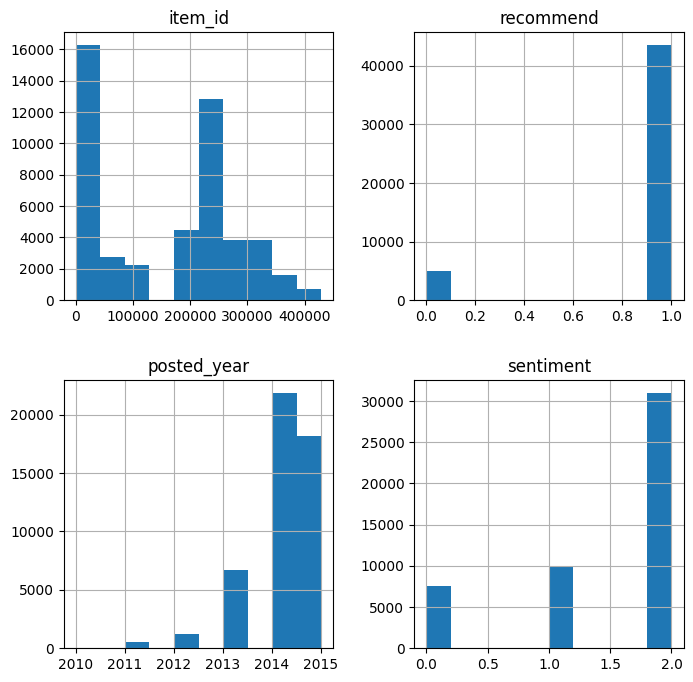

In [6]:
# ---> Assining a numeric value to 'recommend' column
df_reviews_satrans = df_reviews_sa
le = LabelEncoder()
df_reviews_satrans['recommend'] = le.fit_transform(df_reviews_satrans['recommend'])
df_reviews_satrans.hist(figsize=(8,8))

### 3. Correlational Analysis

In [7]:
df_reviews_sa.corr()

,item_id,recommend,posted_year,sentiment
item_id,1.000000,-0.128117,0.305233,-0.044100
recommend,-0.128117,1.000000,-0.124907,0.254790
posted_year,0.305233,-0.124907,1.000000,-0.072493
sentiment,-0.044100,0.254790,-0.072493,1.000000


** Low levels of correlation between the variables in the dataset are observed.

In [8]:
df_reviews_sa.head()

,item_id,recommend,posted_year,sentiment
0,1250,1,2011,2
1,22200,1,2011,2
2,43110,1,2011,2
3,251610,1,2014,2
4,227300,1,2013,2


### 4. About the 'recommend' variable

This column is a categorical character, since it represents whether something is recommended (true) or not (false). Such information is interesting for endpoints when analyzing the most recommended games, or the developers with the games least recommended by users.

In [9]:
# ---> Count of values in the column 'recommend'
recommendcount = df_reviews_sa['recommend'].value_counts()          
recommendperc = df_reviews_sa['recommend'].value_counts(normalize=True) * 100

In [10]:
recommend_cons = pd.DataFrame({'count': recommendcount,'percentage': recommendperc.round(2).astype(str) + '%'})

In [11]:
recommend_cons = recommend_cons.sort_values(by='count', ascending=False)

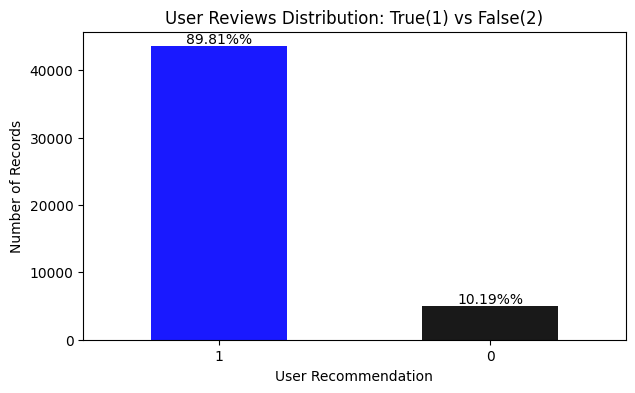

In [17]:
# ---> Bars graphic for the column 'recommend'. In the 'X' axis, True = 1 and False = 0
plt.figure(figsize=(7, 4))
bars = recommend_cons['count'].plot(kind='bar', color=['blue', 'black'], alpha=0.9)
plt.title('User Reviews Distribution: True(1) vs False(2)')
plt.xlabel('User Recommendation')
plt.ylabel('Number of Records')

for bar, percentage in zip(bars.patches, recommend_cons['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

** There is a significant imbalance, with 87.59% of the values representing 'True' and only 12.41% 'False'. This type of imbalance would significantly affect the model's ability to learn patterns.

### 5. About 'posted_year' variable

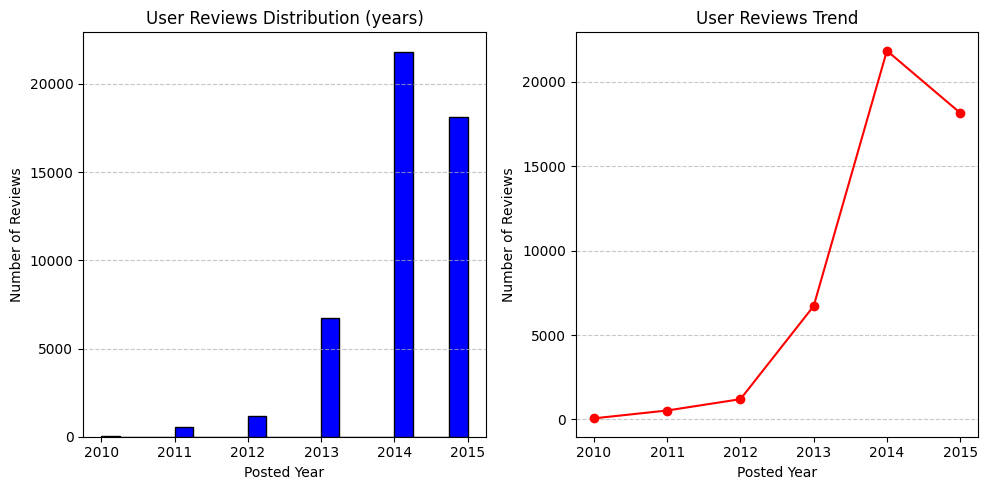

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df_reviews_sa['posted_year'], bins=20, color='blue', edgecolor='black')
axs[0].set_title('User Reviews Distribution (years)')
axs[0].set_xlabel('Posted Year')
axs[0].set_ylabel('Number of Reviews')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para mostrar tendencias temporales
trends = df_reviews_sa['posted_year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='red')
axs[1].set_title('User Reviews Trend')
axs[1].set_xlabel('Posted Year')
axs[1].set_ylabel('Number of Reviews')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

** Histogram of Year Distribution:
Most reviews are concentrated in the most recent years, particularly 2014, 2015.
The year 2010 has the lowest number of reviews, suggesting a significant increase in user participation over time, perhaps due to the growing popularity of the Steam platform.

** Time Trend Graph:
The time trend shows a steady growth in the number of reviews over the years.The line peaks in 2014, indicating a peak in review activity in that year.

`The focus on specific years may indicate considerable improvements in the quality and enhancement of games, although it may also, but to a lesser extent, indicate successful expansion and marketing policies for the STEAM platform.`

### 6. About 'sentiment' variable

As part of the 'Feature Engineering' exercise, the 'sentiment' column has been created, which aims to improve the analysis and performance of the Machine Learning model from the 'reviews' column, originally contained in the source file; 'Australian_users_reviews.json', which included game reviews made by users.

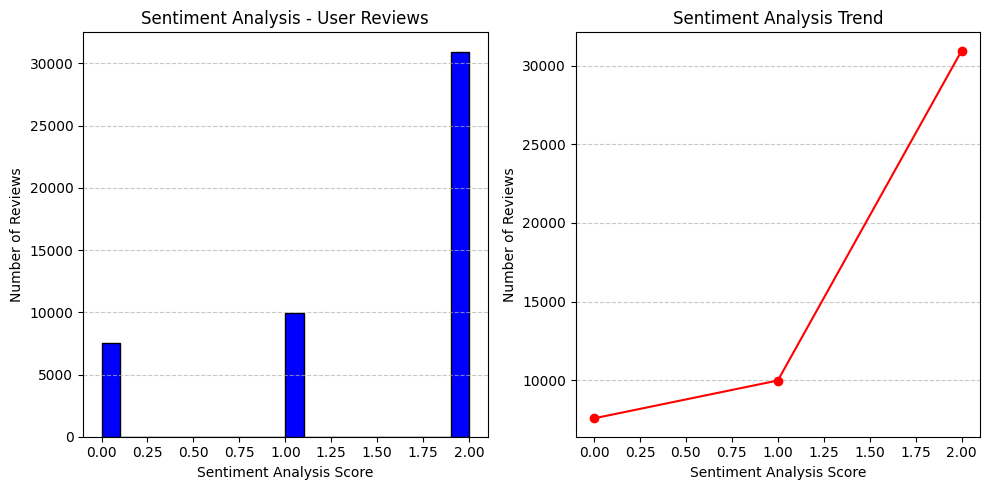

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df_reviews_sa['sentiment'], bins=20, color='blue', edgecolor='black')
axs[0].set_title('Sentiment Analysis - User Reviews')
axs[0].set_xlabel('Sentiment Analysis Score')
axs[0].set_ylabel('Number of Reviews')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


trends = df_reviews_sa['sentiment'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='red')
axs[1].set_title('Sentiment Analysis Trend')
axs[1].set_xlabel('Sentiment Analysis Score')
axs[1].set_ylabel('Number of Reviews')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

** The sentiment analysis is the result of using the NLTK (Natural Language Toolkit) library with the Vader sentiment analyzer, which provides a composite score that can be used to classify the polarity of the reviews into negative (value '0'), neutral (value '1') or positive (value '2'). Absent written reviews were assigned a value of '1'. See details in the notebook: 'Sentiment_analysis.ipynb'.

** It is important to note that the accuracy of any sentiment analysis method can be highly dependent on the specific context of the dataset and the language used in the reviews. If accuracy is a primary concern and the dataset allows it more advanced approaches, such as deep learning models trained for sentiment analysis, could be considered for a second phase.

** In summary, the selected approach with the Vader sentiment analyzer in NLTK is chosen for its balance between ease of implementation, computational efficiency and acceptable levels of accuracy for the purpose of sentiment analysis in this specific context.

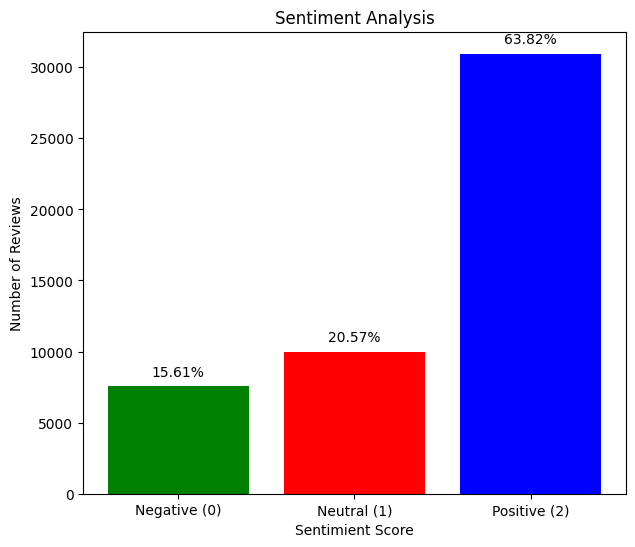

In [15]:
# ---> Count of values in the column 'sentiment'
sentimentcount = df_reviews_sa['sentiment'].value_counts()
sentimentperc = (df_reviews_sa['sentiment'].value_counts(normalize=True) * 100).round(2)

sentimient_cons = pd.DataFrame({'count': sentimentcount, 'percentage': sentimentperc.astype(str) + '%'})

sentimient_cons = sentimient_cons.sort_index()

fig, ax = plt.subplots(figsize=(7, 6))

ax.bar(sentimient_cons.index, sentimient_cons['count'], color=['green', 'red', 'blue'])

for i, v in enumerate(sentimient_cons['percentage']):
    ax.text(i, sentimient_cons['count'][i] + 500, f"{v}", ha='center', va='bottom')

ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentimient Score')
ax.set_ylabel('Number of Reviews')
ax.set_xticks(sentimient_cons.index)
ax.set_xticklabels(['Negative (0)', 'Neutral (1)', 'Positive (2)'])

plt.show()

In [16]:
# ---> Blank fields in the 'sentiment' column
blankcount = (df_reviews_sa['sentiment'].isnull()).sum()
blankperc = (blankcount / len(df_reviews_sa) * 100).round(2)
print(f"Number of blank fields on 'sentiment': {blankcount}  Percentage: {blankperc}%")


Number of blank fields on 'sentiment': 0  Percentage: 0.0%


** X = Positive (2):
It represents 63.82% of the total number of reviews, indicating that the majority of reviews have a positive sentiment.

** X = Neutral (1):
It represents 20.57% of the total number of reviews, indicating that this percentage does not have a defined sentiment towards the game reviewed.

** X = Negative 15.61% (0):
It represents 15.61% of the total reviews, indicating that negative reviews have the lowest presence. 

** In a general view, the sentiment variable has a positive tilt in terms of user reviews.